In [1]:
import numpy as np
import pandas as pd
import scipy
import os
from sklearn import metrics
from matplotlib import pyplot as plt
import matplotlib as mpl
import pickle
import seaborn as sns
import matplotlib
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
sns.set(style="whitegrid")


In [19]:
dset = "2yrprev_within3"

In [20]:
# NOTE: the categorical ones are NOT the one-hot encoded version for the model, but the raw versions from before standardization

cognitive_features = ['cts_animals', 'cts_bname', 'cts_catflu','cts_db', 'cts_delay', 'cts_df', 'cts_doperf', 'cts_ebdr', 'cts_ebmt',\
            'cts_fruits', 'cts_idea', 'cts_lopair', 'cts_mmse30', 'cts_nccrtd','cts_pmat', 'cts_pmsub', 'cts_read_nart', \
            'cts_sdmt', 'cts_story', 'cts_stroop_cname', 'cts_stroop_wread', 'cts_wli', 'cts_wlii', 'cts_wliii']
medical_features_sums = ['med_con_sum_cum', 'vasc_3dis_sum', 'vasc_risks_sum']

continuous_demographics = ['age_at_visit', 'educ']

composite_vars = {
    "cogn_ep": ["cts_wli", "cts_wlii", "cts_wliii", "cts_ebmt", "cts_ebdr",  "cts_story","cts_delay"],
    "cogn_po": ["cts_lopair", "cts_pmat"],
    "cogn_ps": ["cts_sdmt", "cts_nccrtd", "cts_stroop_cname", "cts_stroop_wread"],
    "cogn_se":  ["cts_bname", "cts_catflu", "cts_read_nart"],
    "cogn_wo": ["cts_db", "cts_df", "cts_doperf"],
    "cogn_global":  ["cts_wli", "cts_wlii", "cts_wliii", "cts_ebmt", "cts_ebdr",  "cts_story","cts_delay",\
                     "cts_lopair", "cts_pmat", "cts_sdmt", "cts_nccrtd", "cts_stroop_cname", "cts_stroop_wread",
                     "cts_bname", "cts_catflu", "cts_read_nart", "cts_db", "cts_df", "cts_doperf"] }
    
# these can stay as is
binary = ['hypertension_cum', 'cancer_cum','diabetes_sr_rx', 'dm_cum', 'headinjrloc_cum', 'lostcons',\
                         'thyroid_cum', 'chf_cum', 'claudication_cum', 'heart_cum', 'stroke_cum', "msex", "spanish"]


# these need to be one hot encoded
categorical = ['apoe_4count', 'race', 'dcfdx']


In [21]:
def color_mapper(cmap, minima, maxima):
    norm = matplotlib.colors.Normalize(vmin=minima, vmax=maxima, clip=True)
    return matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)

def vals_to_colors(array, cmap, minimum, maximum):   
    
    color_list = []
    for elt in array:
        if np.isnan(elt):
            color_list.append([0,0,0,1])
        else:
            color_list.append(color_mapper(cmap, minimum, maximum).to_rgba(elt))
    return np.array(color_list)

In [24]:
load_data = pd.read_csv("../DATA/PROCESSED/standardized/merged_data_all_%s.csv"%dset, index_col=0)

sample_info = ["projid","study","fu_year","scaled_to", "onset_label_time", 'onset_label_time_binary']
data = load_data[sample_info]

In [26]:
feature_names = np.setdiff1d(load_data.columns, sample_info)
features = load_data[feature_names]

In [28]:
meanstds =  pd.read_csv("../DATA/PROCESSED/standardized/%s_mean_std.csv"%dset,index_col=0)

def unstandardize(zscores, m, s):
    return zscores*s + m

In [29]:
allvars = ['apoe_genotype__22.0', 'apoe_genotype__23.0',
       'apoe_genotype__24.0', 'apoe_genotype__33.0', 'apoe_genotype__34.0',
       'apoe_genotype__44.0', 'age_at_visit', 'educ', 'msex', 'cts_catflu',
       'cts_mmse30', 'cts_sdmt', 'cts_wli', 'cts_wlii', 'cts_wliii']

In [30]:
cmap=plt.cm.tab20
cmaplist = [cmap(i) for i in range(cmap.N)]

C:\Users\nbbwang\Anaconda2\envs\py36\lib\site-packages\seaborn\categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])
C:\Users\nbbwang\Anaconda2\envs\py36\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)
C:\Users\nbbwang\Anaconda2\envs\py36\lib\site-packages\matplotlib\pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


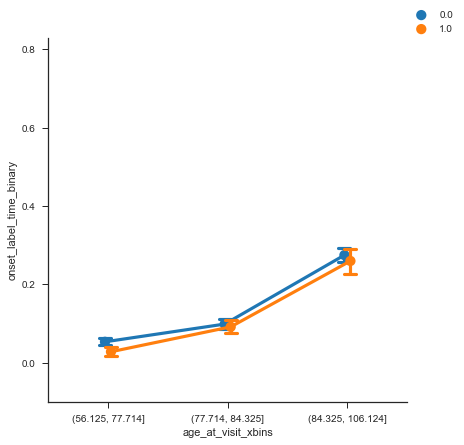

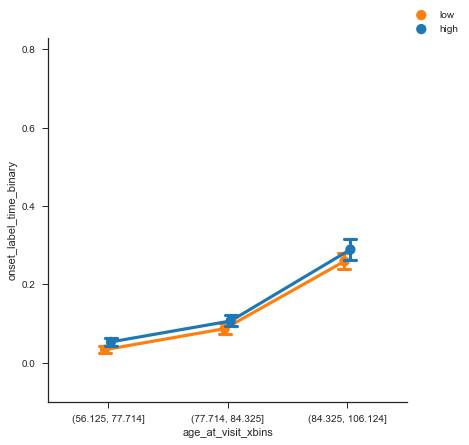

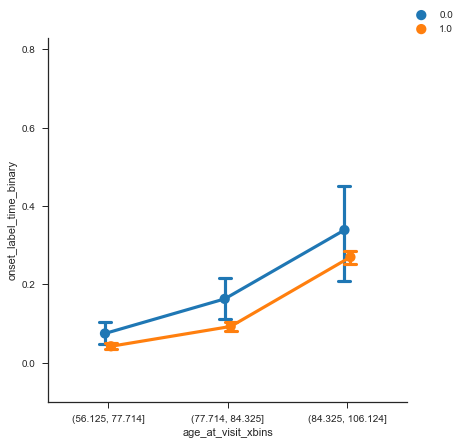

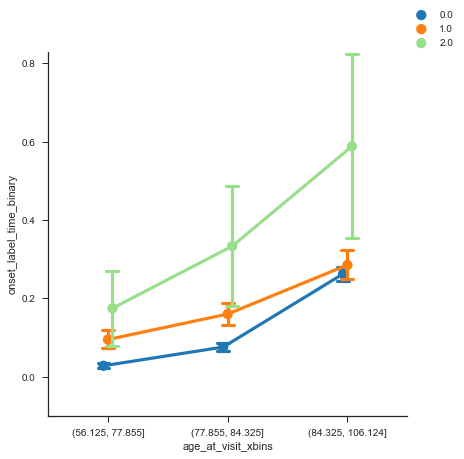

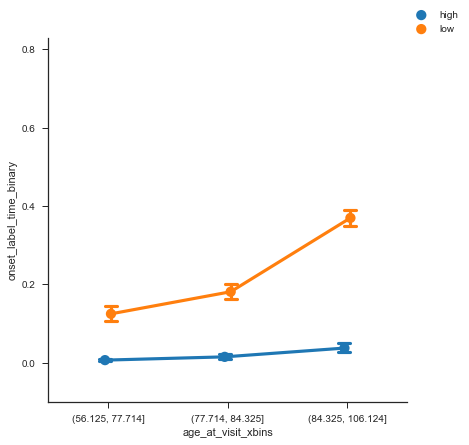

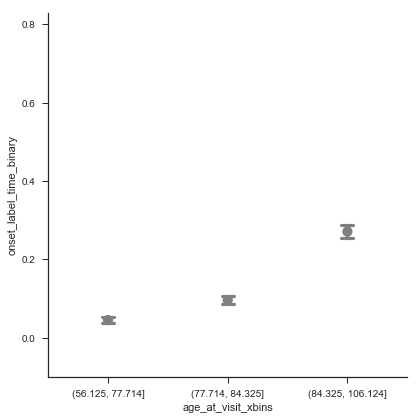

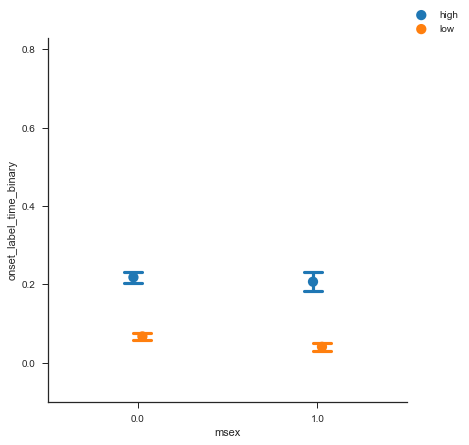

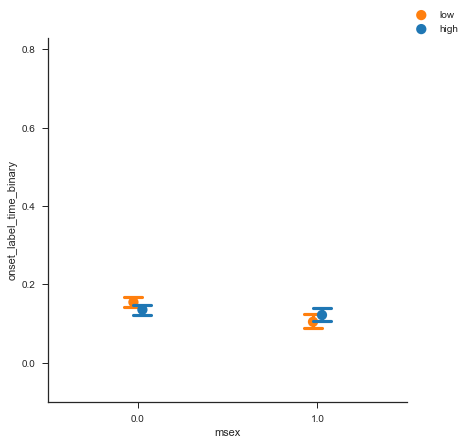

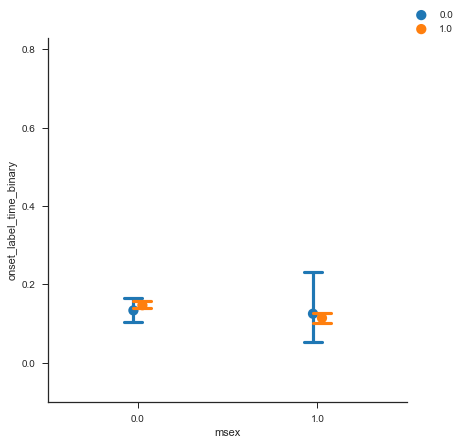

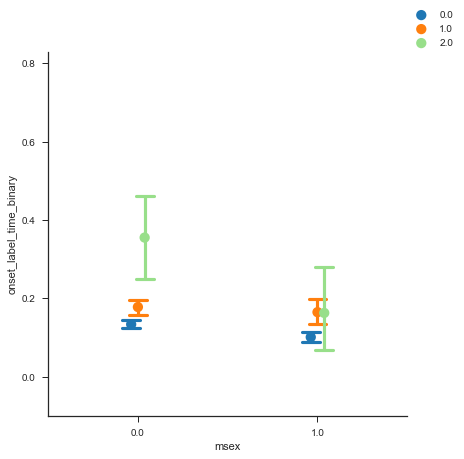

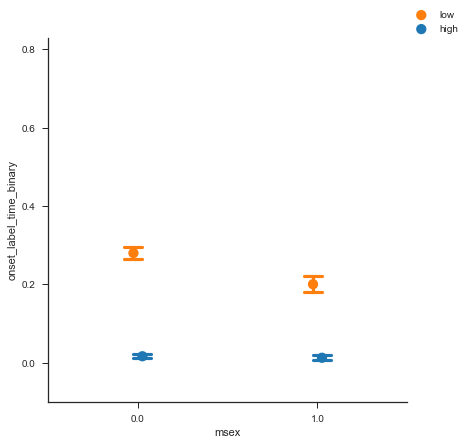

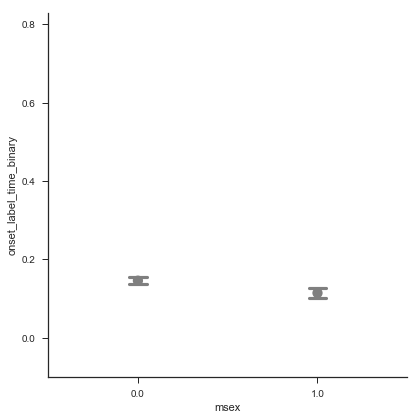

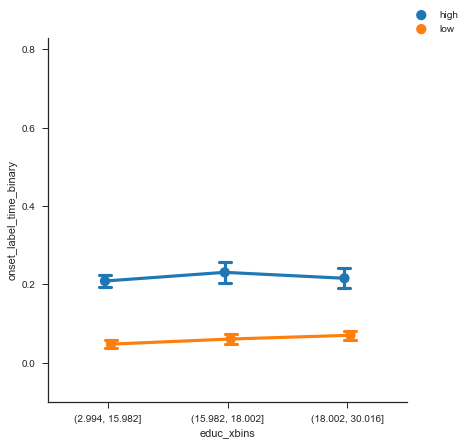

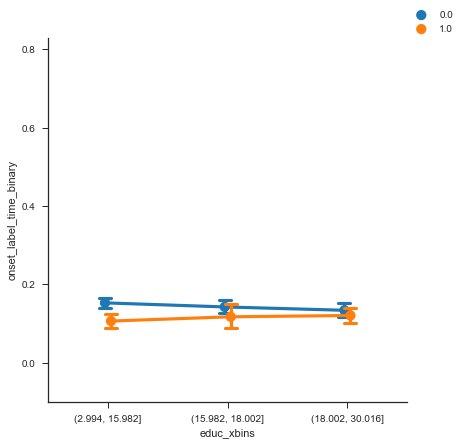

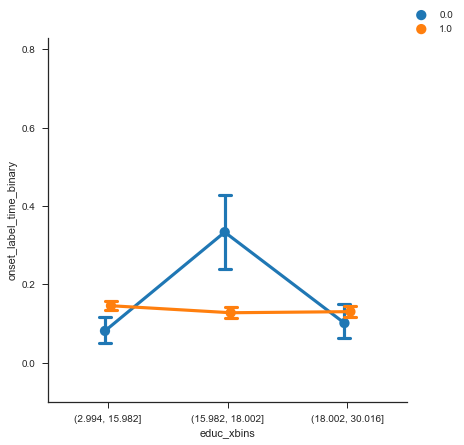

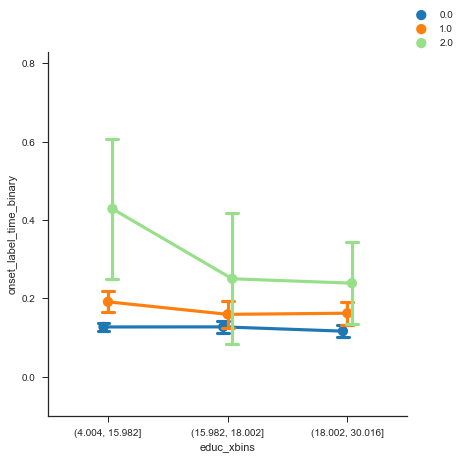

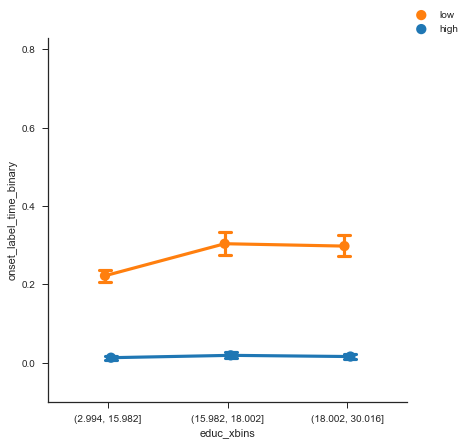

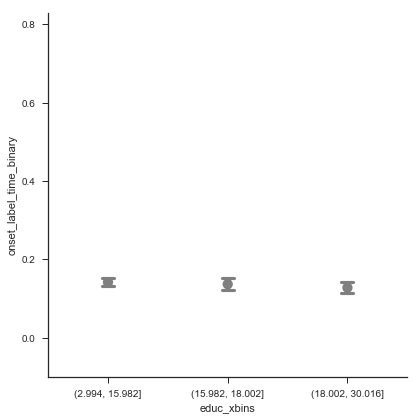

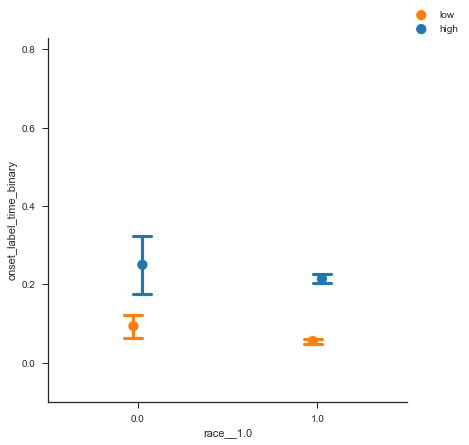

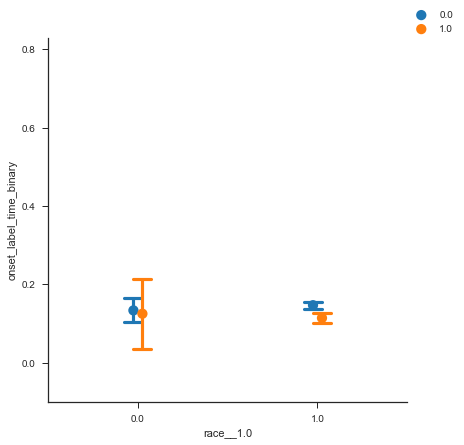

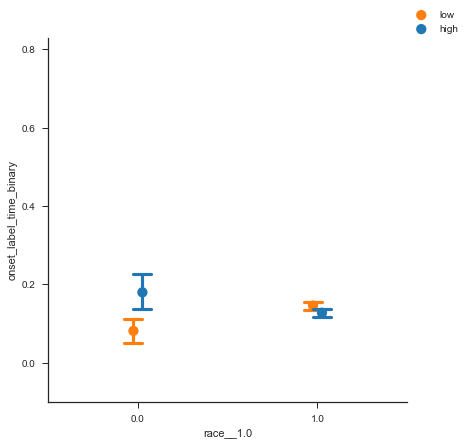

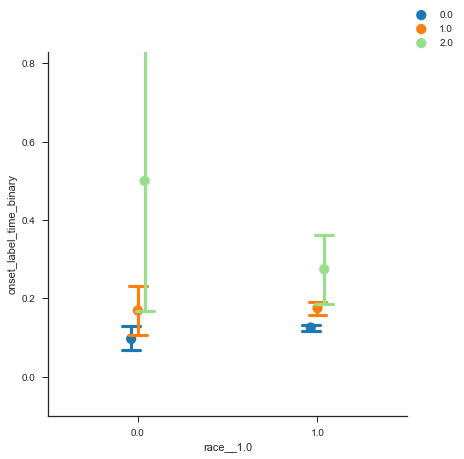

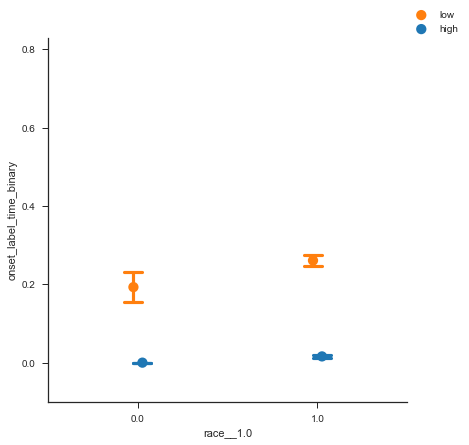

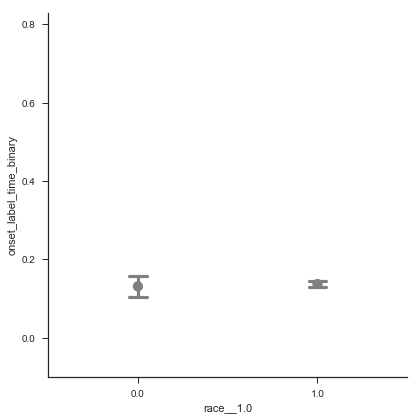

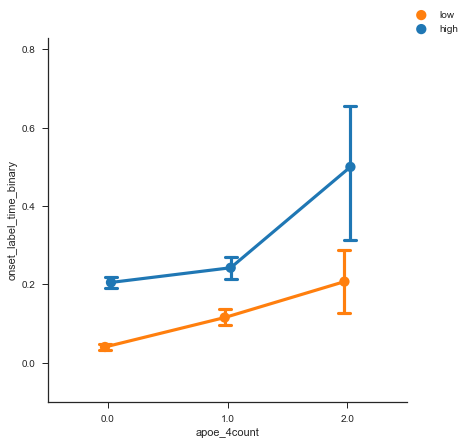

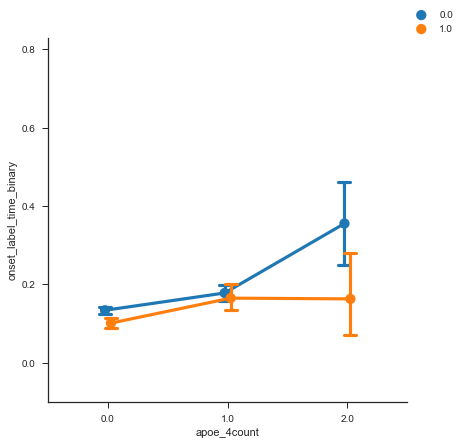

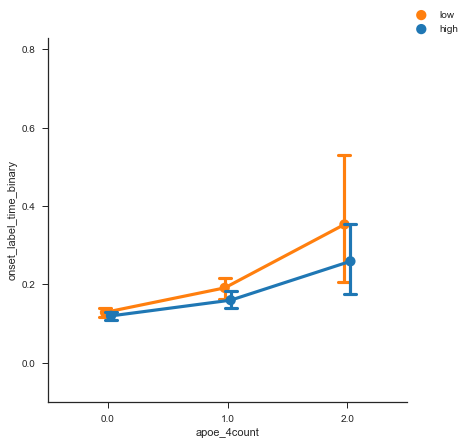

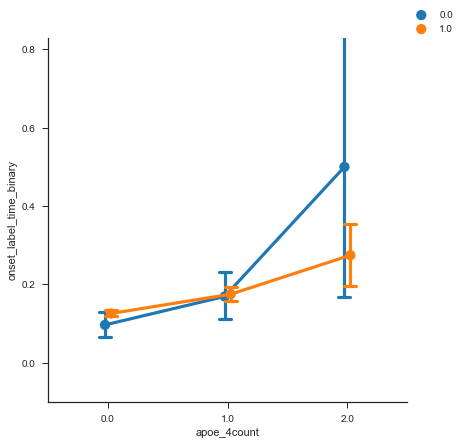

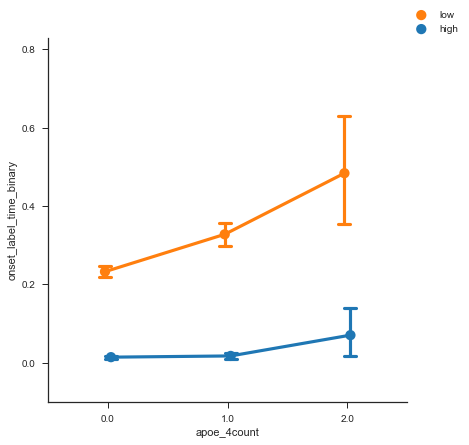

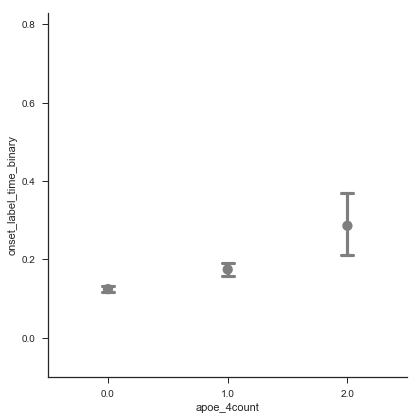

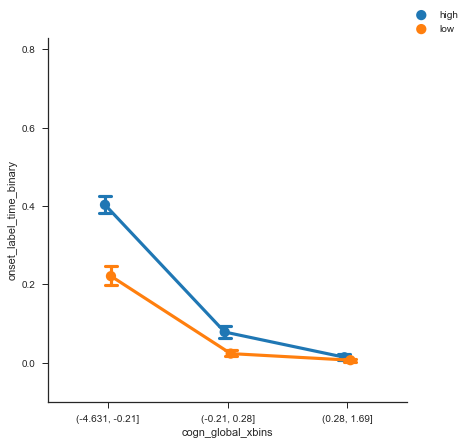

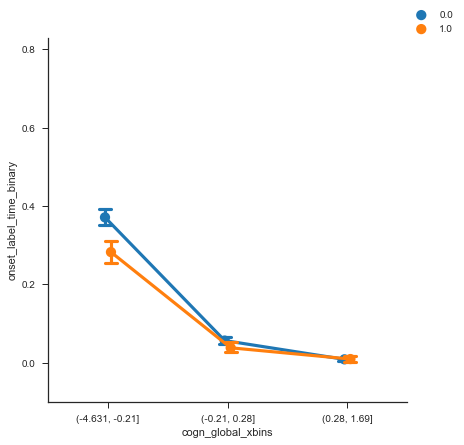

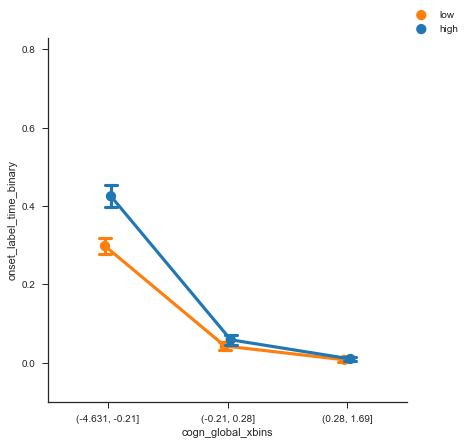

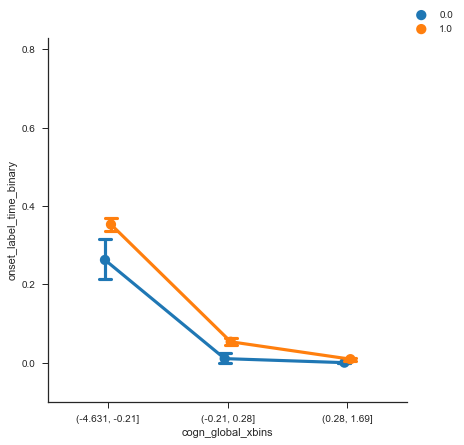

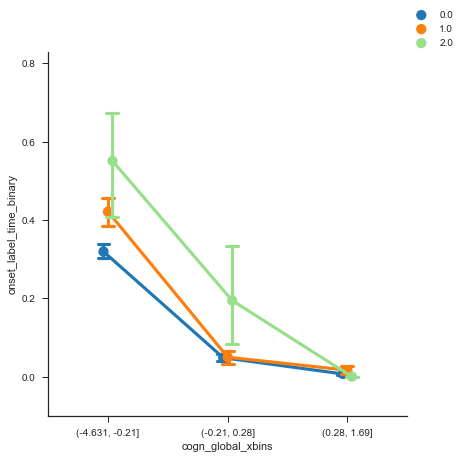

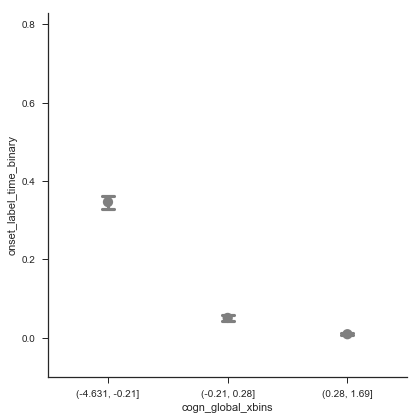

In [34]:
numcuts=3
df_to_plot = load_data

df_to_plot["apoe_4count"] = 0 * df_to_plot[['apoe_genotype__22.0', 'apoe_genotype__23.0','apoe_genotype__33.0']].sum(axis=1) + \
1 * df_to_plot[['apoe_genotype__24.0', 'apoe_genotype__34.0']].sum(axis=1) + \
2 * df_to_plot['apoe_genotype__44.0']

color_vars = ["age_at_visit", "cts_mmse30", "msex", "educ", "apoe_genotype__44.0", "apoe_4count"]


color_vars = ["educ", "msex",  "age_at_visit"]
x_vars = ["cogn_global"]#, "age_at_visit","cts_mmse30", "msex", "educ", "apoe_genotype__44.0", "apoe_4count"


color_vars = ["apoe_4count"]
x_vars = ["msex", "age_at_visit", "cogn_global"]


color_vars = ["age_at_visit", "msex", "educ", "race__1.0","apoe_4count", "cogn_global"]
x_vars = ["age_at_visit", "msex", "educ","race__1.0", "apoe_4count", "cogn_global"]


# x_vars = allvars
# color_vars = allvars
for i,xax in enumerate(x_vars):
    for j, cax in enumerate(color_vars):
        if (xax != cax):
    
        
            temp1 = df_to_plot[np.unique([xax, cax, "onset_label_time_binary"])].dropna()
            temp1[xax] = temp1[xax].apply(lambda x: np.round(x,2))
            temp1[cax] = temp1[cax].apply(lambda x: np.round(x,2))
            temp1 = temp1.sort_values(by=[xax])
            
            # FOR CONTINUOUS FEATURES
            if len(np.unique(df_to_plot[xax].dropna())) > 3:
                
                xvar = xax+"_xbins"
                if xax in continuous_demographics+["cts_mmse30", "cogn_global"]:
                    if xax in meanstds.index:
                        temp1[xvar] = pd.qcut(unstandardize(temp1[xax], meanstds.loc[xax][" mean"], meanstds.loc[xax][" std"]),numcuts, duplicates="drop").astype(str)
                    
                    else:
                        temp1[xvar] = pd.qcut(temp1[xax],numcuts, duplicates="drop").astype(str)

                else:    
                    temp1[xvar] = pd.qcut(temp1[xax],3, duplicates="drop").astype(str)
            
            # FOR CATEGORICAL FEATURES
            else:
                xvar = xax

            if len(np.unique(df_to_plot[cax].dropna())) > 3:
                cvar = cax+"_cbins"
                temp1[cvar] = pd.qcut(temp1[cax],2, labels=["low", "high"]).astype(str)
                
                if cax in continuous_demographics+["cts_mmse30", "cogn_global"]:
                    if cax in meanstds.index:
                        temp1[cvar+"cvals"] = pd.qcut(unstandardize(temp1[cax], meanstds.loc[cax][" mean"], meanstds.loc[cax][" std"]),2, duplicates="drop").astype(str)
                    else:
                        temp1[cvar+"cvals"] = pd.qcut(temp1[cax],2).astype(str)
                    #print(temp1[cvar+"cvals"].unique())

            else:
                cvar = cax


            #print(xvar, cvar)
            temp_df = temp1[[xvar, cvar, "onset_label_time_binary"]].dropna()
            plt.figure(figsize=(6,6))
            sns.set_style("ticks")

            
            color_dict_fracs = {}
            for group,elt in  temp_df.groupby(cvar):
                color_dict_fracs[group] = len(elt)/len(temp_df)
                
            color_dict_alphas = {key:value/np.max(list(color_dict_fracs.values())) for (key,value) in color_dict_fracs.items()}

            color_dict = {}
            for i,key in enumerate(color_dict_alphas.keys()):
                color_dict[key] = tuple(list(cmaplist[2*i][:3])+ [color_dict_alphas[key]])    
            
            color_dict[2] = tuple(list(cmaplist[5][:3])+ [color_dict_alphas[key]])    
                
            if xvar in ["msex", "race__1.0"]:
                join_tf = False
            else:
                join_tf = True
            ax =sns.pointplot(data=temp_df, x = xvar, y="onset_label_time_binary", hue=cvar, capsize=.1, 
                              dodge=True, palette=color_dict, join=join_tf)
            
            ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
            ax.set_ylim(-.1,.83)
            ax.spines['right'].set_visible(False)
            ax.spines['top'].set_visible(False)

            plt.legend(loc=(1.,1.))
            plt.tight_layout()

    plt.figure(figsize=(6,6))
    ax =sns.pointplot(data=temp_df, x = xvar, y="onset_label_time_binary", capsize=.1, 
                      dodge=True, palette=[cmaplist[-6]])
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    ax.set_ylim(-.1,.83)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    plt.tight_layout()

